In [2]:
import pandas as pd
from prophet import Prophet

/jupyter/notebooks/.venvs/tensor_venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('Data/BeerWineLiquor.csv')

In [4]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


* The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [6]:
df.columns = ['ds', 'y']

In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [9]:
m = Prophet()
m.fit(df)

11:57:29 - cmdstanpy - INFO - Chain [1] start processing
11:57:29 - cmdstanpy - INFO - Chain [1] done processing


### placeholder to hold future predictions

In [10]:

future = m.make_future_dataframe(periods=24, freq='MS')
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [11]:
print(len(future))
print(len(df))

348
324


In [12]:
forecast = m.predict(future)

In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1777.567610,1157.634275,1483.063161,1777.567610,1777.567610,-461.891431,-461.891431,-461.891431,-461.891431,-461.891431,-461.891431,0.0,0.0,0.0,1315.676179
1,1992-02-01,1780.153059,1177.107977,1514.450617,1780.153059,1780.153059,-427.359036,-427.359036,-427.359036,-427.359036,-427.359036,-427.359036,0.0,0.0,0.0,1352.794022
2,1992-03-01,1782.571705,1438.736440,1763.639551,1782.571705,1782.571705,-179.181079,-179.181079,-179.181079,-179.181079,-179.181079,-179.181079,0.0,0.0,0.0,1603.390625
3,1992-04-01,1785.157154,1417.845732,1741.835698,1785.157154,1785.157154,-196.031456,-196.031456,-196.031456,-196.031456,-196.031456,-196.031456,0.0,0.0,0.0,1589.125698
4,1992-05-01,1787.659201,1671.704070,1993.348300,1787.659201,1787.659201,45.529163,45.529163,45.529163,45.529163,45.529163,45.529163,0.0,0.0,0.0,1833.188364


(17000, 19000)

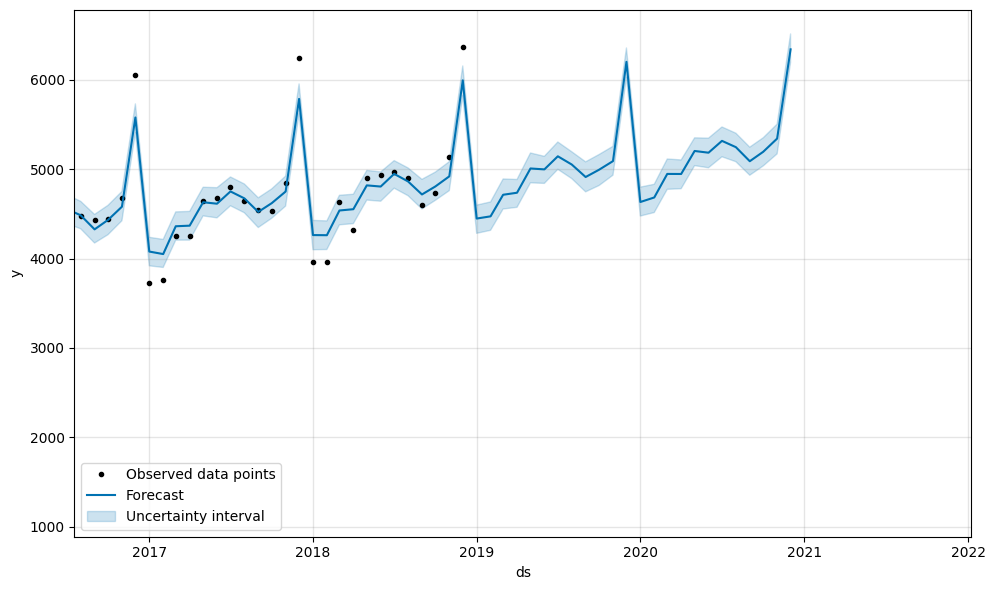

In [18]:
import matplotlib.pyplot as plt
m.plot(forecast, include_legend=True);
plt.xlim(17000, 19000)

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
yhat = forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]